Hypotheses:
H0: mean(before) = mean(after) (no difference)
H1: mean(before) ≠ mean(after) (difference exists)

Mean before: 67.30
Mean after: 72.30
Mean difference: 5.00
95% CI (Before): [65.646, 68.954]
95% CI (After) : [70.753, 73.847]
t-statistic: -23.7171
p-value: 0.0000000
Reject the null hypothesis — the difference is statistically significant.


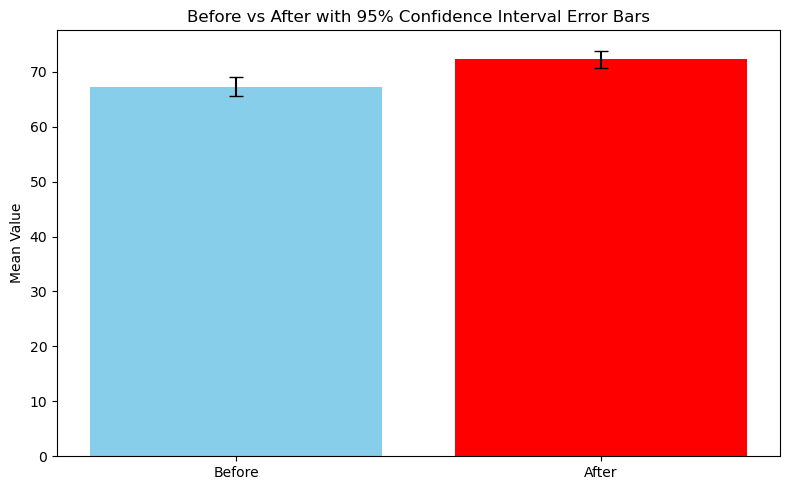

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. Data: scores of the same individuals before and after the training
before = np.array([65, 67, 70, 68, 66, 64, 69, 71, 65, 68])
after  = np.array([70, 72, 74, 73, 71, 70, 75, 76, 70, 72])

# 2. Statistical calculations
diff = after - before
mean_before = np.mean(before)
mean_after = np.mean(after)
mean_diff = np.mean(diff)

# 3. Calculate standard error and 95% CI for each group
alpha = 0.05
n_before = len(before)
n_after  = len(after)

se_before = stats.sem(before)   # standard error of the mean
se_after  = stats.sem(after)

# t-critical for 95% CI (two-tailed)
t_crit_before = stats.t.ppf(1 - alpha / 2, n_before - 1)
t_crit_after  = stats.t.ppf(1 - alpha / 2, n_after - 1)

# Margin of error
moe_before = t_crit_before * se_before
moe_after  = t_crit_after  * se_after

ci_before = (mean_before - moe_before, mean_before + moe_before)
ci_after  = (mean_after  - moe_after,  mean_after  + moe_after)

# 4. Paired t-test
t_stat, p_value = stats.ttest_rel(before, after)

# 5. Hypothesis testing
print("Hypotheses:")
print("H0: mean(before) = mean(after) (no difference)")
print("H1: mean(before) ≠ mean(after) (difference exists)\n")

# 6. Results
print(f"Mean before: {mean_before:.2f}")
print(f"Mean after: {mean_after:.2f}")
print(f"Mean difference: {mean_diff:.2f}")
print(f"95% CI (Before): [{ci_before[0]:.3f}, {ci_before[1]:.3f}]")
print(f"95% CI (After) : [{ci_after[0]:.3f}, {ci_after[1]:.3f}]")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.7f}")

if p_value < alpha:
    print("Reject the null hypothesis — the difference is statistically significant.")
else:
    print("Do not reject the null hypothesis — no significant difference.")

# 7. Plot: Bar chart with 95% CI error bars
labels = ['Before', 'After']
means  = [mean_before, mean_after]
errs   = [moe_before, moe_after]  # half-widths of the 95% confidence intervals

plt.figure(figsize=(8, 5))
plt.bar(labels, means, yerr=errs, capsize=5, color=['skyblue', 'red'])
plt.ylabel('Mean Value')
plt.title('Before vs After with 95% Confidence Interval Error Bars')
plt.tight_layout()
plt.show()
